In [28]:
import sklearn

In [29]:
# Load breast cancer
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

# Display the shape of the data
print(data.data.shape)

# Display the column names
print(data.feature_names)

# Charger le dataset
X, y = load_breast_cancer(return_X_y=True)


(569, 30)
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [30]:
# Train test split
from sklearn.model_selection import train_test_split
# Séparer les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   

# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
# Train the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

# Make predictions
predictions = model.predict(X_test)
print(predictions)

0.9868131868131869
0.9736842105263158
[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 0 0]


In [39]:
# Metrics

# Calculate the accuracy
from sklearn.metrics import accuracy_score
print("Accuracy: ", accuracy_score(y_test, predictions))

# Calculate the precision and recall
from sklearn.metrics import precision_score, recall_score
print("Precision: ", precision_score(y_test, predictions))
print("Recall: ", recall_score(y_test, predictions))

# Calculate the F1 score
from sklearn.metrics import f1_score
print("F1-score: ", f1_score(y_test, predictions))

# Classification report
from sklearn.metrics import classification_report
print("classification_report: \n", classification_report(y_test, predictions))

# Sensitivity and Specificity
# Calculate the confusion matrix
from sklearn.metrics import confusion_matrix
print("confusion_matrix: \n", confusion_matrix(y_test, predictions))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Accuracy:  0.9736842105263158
Precision:  0.9722222222222222
Recall:  0.9859154929577465
F1-score:  0.979020979020979
classification_report: 
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

confusion_matrix: 
 [[41  2]
 [ 1 70]]
Sensitivity :  0.9534883720930233
Specificity :  0.9859154929577465


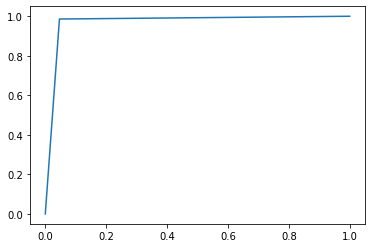

AUC:  0.969701932525385


In [33]:
# Calculate the ROC curve
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test, predictions)
plt.plot(fpr, tpr)
plt.show()

# Calculate the AUC
from sklearn.metrics import roc_auc_score
print("AUC: ", roc_auc_score(y_test, predictions))

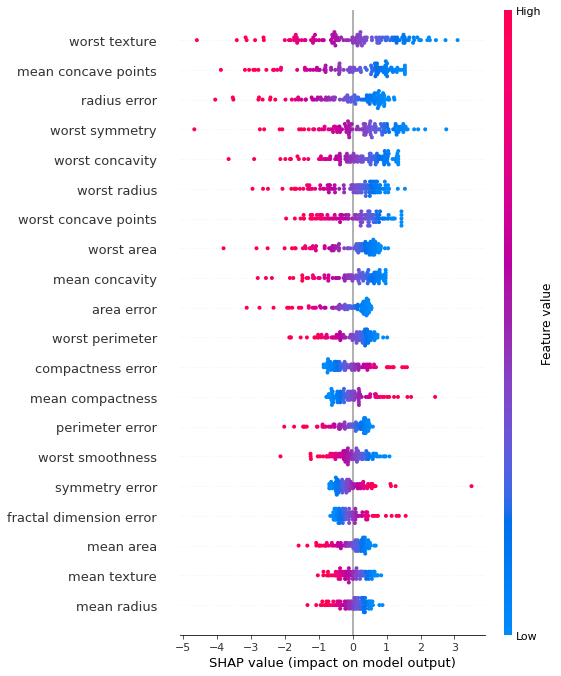

In [40]:
# explain the model's predictions using SHAP
import shap

# Initialiser l'expliqueur SHAP avec le kernel explainer (ou un autre expliqueur adapté)
explainer = shap.Explainer(model, X_train, feature_names=data.feature_names)

# Calculer les valeurs SHAP pour les échantillons de test
shap_values = explainer(X_test)

# visualize the first prediction's explanation
# shap.plots.waterfall(shap_values[0])

# Pour évaluer l'importance des caractéristiques sur des données nouvelles
shap.summary_plot(shap_values, X_test, feature_names=data.feature_names)